In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Paths to dataset
yes_path = 'Brain MRI Images/yes'
no_path = 'Brain MRI Images/no'

def load_data(data_path, label, size=(128, 128)):
    images = []
    labels = []
    for img_file in os.listdir(data_path):
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {img_file}")
            continue
        img_path = os.path.join(data_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Skipping invalid file: {img_path}")
            continue
        img = cv2.resize(img, size)
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load data from both folders
yes_images, yes_labels = load_data(yes_path, label=1)
no_images, no_labels = load_data(no_path, label=0)

# Combine and split data
X = np.concatenate([yes_images, no_images], axis=0)
y = np.concatenate([yes_labels, no_labels], axis=0)

# Normalize and expand dimensions for the model
X = X / 255.0
X = np.expand_dims(X, axis=-1)  # Shape becomes (samples, 128, 128, 1)

# Convert labels to categorical
y = to_categorical(y, num_classes=2)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Skipping non-image file: .DS_Store
Skipping non-image file: .DS_Store
Training set shape: (188, 128, 128, 1)
Validation set shape: (48, 128, 128, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape=(128, 128, 1)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Print the model summary
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,322 (12.60 MB)

 Trainable params: 3,304,322 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.6091 - loss: 0.7024 - val_accuracy: 0.7500 - val_loss: 0.5966
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.7137 - loss: 0.5814 - val_accuracy: 0.7917 - val_loss: 0.5007
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7677 - loss: 0.5083 - val_accuracy: 0.7708 - val_loss: 0.4614
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7813 - loss: 0.5100 - val_accuracy: 0.8125 - val_loss: 0.4751
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7842 - loss: 0.4737 - val_accuracy: 0.8125 - val_loss: 0.4472
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.7417 - loss: 0.4941 - val_accuracy: 0.8125 - val_loss: 0.4206
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7828 - loss: 0.5064 - val_accuracy: 0.8542 - val_loss: 0.4026
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.8097 - loss: 0.4252 - val_accuracy: 0.9167 - val_loss:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save the trained model
model.save('brain_mri_tumor_classifier2.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9236 - loss: 0.2572


Validation Loss: 0.26007968187332153
Validation Accuracy: 0.9166666865348816


In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Predict on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = y_val_pred.argmax(axis=1) 
y_val_true_classes = y_val.argmax(axis=1)    

# Generate classification metrics
report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=["No Tumor", "Tumor"])
precision, recall, f1, _ = precision_recall_fscore_support(y_val_true_classes, y_val_pred_classes, average="weighted")

print(report)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
              precision    recall  f1-score   support

    No Tumor       0.91      0.91      0.91        22
       Tumor       0.92      0.92      0.92        26

    accuracy                           0.92        48
   macro avg       0.92      0.92      0.92        48
weighted avg       0.92      0.92      0.92        48

Precision: 0.92, Recall: 0.92, F1-Score: 0.92


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('brain_mri_tumor_classifier3.h5')

# Predict on a new image
def predict_image(image_path, model, size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size) / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    confidence = prediction[0][np.argmax(prediction)] * 100
    class_idx = np.argmax(prediction)
    return "Tumor" if class_idx == 1 else "No Tumor"

# Example usage
image_path = 'Brain MRI Images/brain_tumor_dataset/test/No17.jpg'
result = predict_image(image_path, model)
print(f"Prediction: {result}")
print(confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: No Tumor


In [ ]:
def predict_image(image_path, model, size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size) / 255.0
    img = np.expand_dims(img, axis=-1)  
    img = np.expand_dims(img, axis=0) 
    
    prediction = model.predict(img)
    confidence = prediction[0][np.argmax(prediction)] * 100 
    class_idx = np.argmax(prediction)
    class_label = "Tumor" if class_idx == 1 else "No Tumor"
    
    print(f"Prediction: {class_label}, Confidence: {confidence:.2f}%")
    return class_label


image_path = 'Brain MRI Images/brain_tumor_dataset/test/y250.jpg'
result = predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction: Tumor, Confidence: 98.99%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


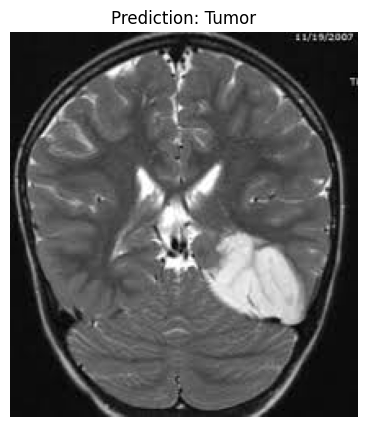

<Figure size 640x480 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt

def visualize_prediction(image_path, model):
    result = predict_image(image_path, model)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original MRI Image")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()
    plt.tight_layout()

# Visualize
visualize_prediction(image_path, model)

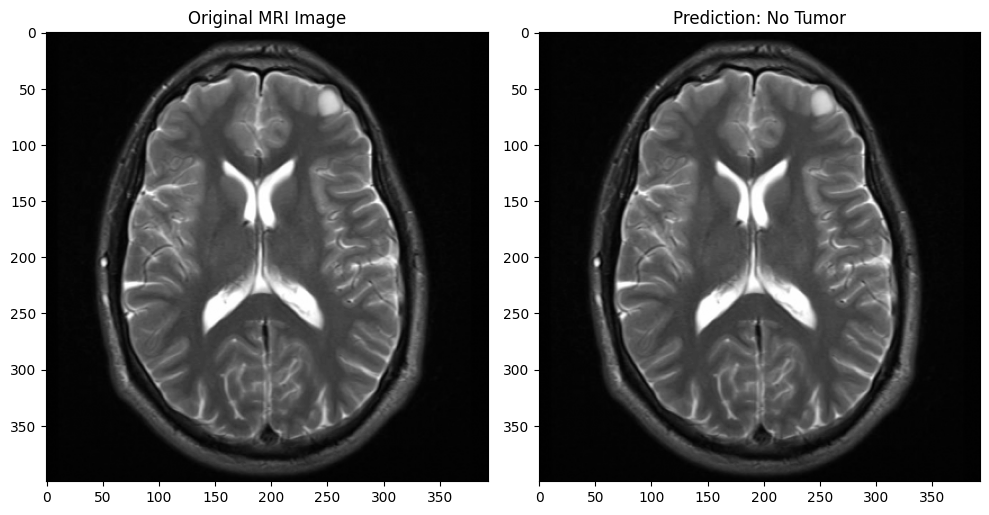

In [88]:
import matplotlib.pyplot as plt
import cv2

def visualize_prediction_side_by_side(image_path, model):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Preprocess the image for prediction
    processed_img = cv2.resize(img, (128, 128)) / 255.0
    processed_img = processed_img.reshape(1, 128, 128, 1)  # Add batch and channel dimensions
    
    # Plot the original image and prediction
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original MRI Image")
    plt.imshow(img, cmap='gray')
    plt.axis('on')
    
    plt.subplot(1, 2, 2)
    plt.title(f"Prediction: {result}")
    plt.imshow(img, cmap='gray')  # Show the same image; prediction is shown as text
    plt.axis('on')
    
    plt.tight_layout()
    plt.show()

# Example Usage
visualize_prediction_side_by_side('Brain MRI Images/brain_tumor_dataset/test/No17.jpg', model)

In [14]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

NameError: name 'plt' is not defined

In [49]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(X_val, y_val)

# Print the accuracy
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9236 - loss: 0.2572 
Validation Accuracy: 91.67%


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.6148 - loss: 0.7260 - val_accuracy: 0.7917 - val_loss: 0.5820
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7099 - loss: 0.5601 - val_accuracy: 0.8125 - val_loss: 0.5013
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7894 - loss: 0.4952 - val_accuracy: 0.7917 - val_loss: 0.4796
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7581 - loss: 0.5155 - val_accuracy: 0.8125 - val_loss: 0.4856
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7320 - loss: 0.5410 - val_accuracy: 0.8125 - val_loss: 0.4405
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7998 - loss: 0.4387 - val_accuracy: 0.8125 - val_loss: 0.4209
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.7991 - loss: 0.4418 - val_accuracy: 0.8750 - val_loss: 0.4686
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8340 - loss: 0.4588 - val_accuracy: 0.8750 - val_loss:

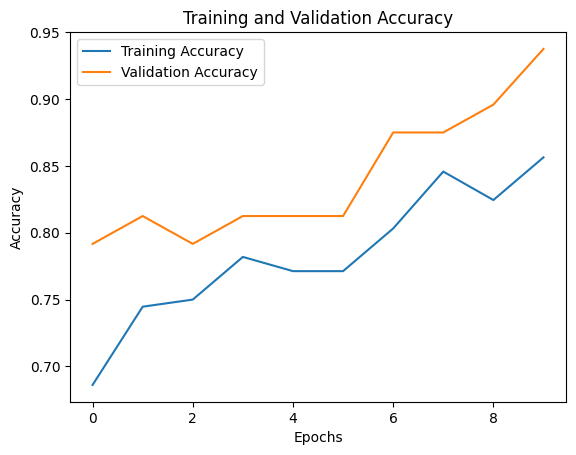

In [54]:
# Access training history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()